<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/23_Keras_More_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras More & Deep Learning

## CIFAR-10

### Your name :

#### 실습목표<br>
1. 딥러닝의 기본 아이디어를 이해한다.
2. keras를 이용하여 Optimizer를 설정할 수 있다.
3. keras를 이용하여 Dropout이 가능하다.
4. keras를 이용하여 초기값을 설정할 줄 안다.
5. keras를 이용하여 Batch Normalization이 가능하다.
6. keras의 callback 기능을 사용할 줄 안다.

--------------------------
Rayleigh Kim @ D:plus

## Deep Learning on CIFAR-10

### Library Loading

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from keras import layers, models

import random as rd

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


### Data Loading & Preparation

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


MNIST데이터셋과 모양 차이를 보자.

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 7717
다음 그림은 Cat 입니다.


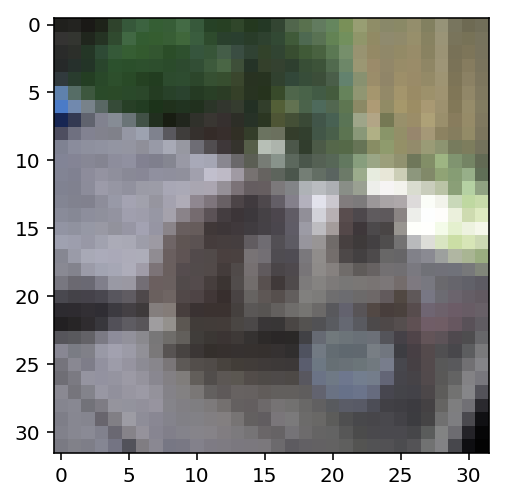

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

단순한 뉴럴넷은 32x32x3의  데이터를 인풋으로 받지 못한다.

납작하게 모양을 바꾸자.

In [0]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

print(train_x.shape, test_x.shape)

(50000, 3072) (10000, 3072)


이미지의 값이기 때문에 0 ~ 255 사이의 값을 갖는다.

전부 0~1사이의 값을 갖도록 scale을 조정하자!

**생각해볼 것 : 데이터들간의 scale이 다르면 무슨차이가 생길까?**

![unscaled](https://i.stack.imgur.com/GeAcX.png) ![scaled](https://i.stack.imgur.com/30hnH.png)

In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


In [0]:
# One-hot Encoding

train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)

print(test_y[2])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
train_x.shape

(50000, 3072)

### Sequential을 이용하여 모델링을 할거야! (추천)

모델링을 하기 전에!
* 로지스틱 리그레션의 기능을 안다!
* 뉴런의 구조를 안다!
* 뉴럴넷의 구조를 안다.
* 히든레이어 안의 뉴런 하나의 역할을 이해한다.

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), activation='relu', name = 'Hidden1'))

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, activation = 'relu', name = 'Hidden2') )
model.add( Dense(512, activation = 'relu', name = 'Hidden3') )

# output Layer
model.add( layers.Dense(10, activation = 'softmax')     )

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])

W0711 02:18:19.591247 139734213851008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0711 02:18:19.595179 139734213851008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 02:18:19.641512 139734213851008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 02:18:19.646116 139734213851008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W071

In [0]:
print('히든 레이어를 여러개 갖는 딥러닝 모델')
print('딥러닝이라 불리는 모델들 중 가장 기본 구조이다.')
model.summary()

히든 레이어를 여러개 갖는 딥러닝 모델
딥러닝이라 불리는 모델들 중 가장 기본 구조이다.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
Hidden2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
Hidden3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 4,726,282
Trainable params: 4,726,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 100,
                    validation_split = 0.2, verbose=1)


W0711 02:19:52.660966 139734213851008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 9s 226us/step - loss: 1.9160 - acc: 0.3069 - val_loss: 1.7229 - val_acc: 0.3852
Epoch 2/15
40000/40000 [==============================] - 5s 130us/step - loss: 1.6847 - acc: 0.3935 - val_loss: 1.6515 - val_acc: 0.4129
Epoch 3/15
40000/40000 [==============================] - 5s 129us/step - loss: 1.6018 - acc: 0.4247 - val_loss: 1.6193 - val_acc: 0.4185
Epoch 4/15
40000/40000 [==============================] - 5s 129us/step - loss: 1.5384 - acc: 0.4473 - val_loss: 1.5466 - val_acc: 0.4539
Epoch 5/15
40000/40000 [==============================] - 5s 129us/step - loss: 1.4889 - acc: 0.4689 - val_loss: 1.5461 - val_acc: 0.4536
Epoch 6/15
40000/40000 [==============================] - 5s 130us/step - loss: 1.4462 - acc: 0.4817 - val_loss: 1.5687 - val_acc: 0.4501
Epoch 7/15
40000/40000 [==============================] - 5s 129us/step - loss: 1.4058 - acc: 0.4962 - val_loss: 1.4935 - 

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 0s 46us/step
Test Loss : 1.450405,  Test Accuracy : 49.750%


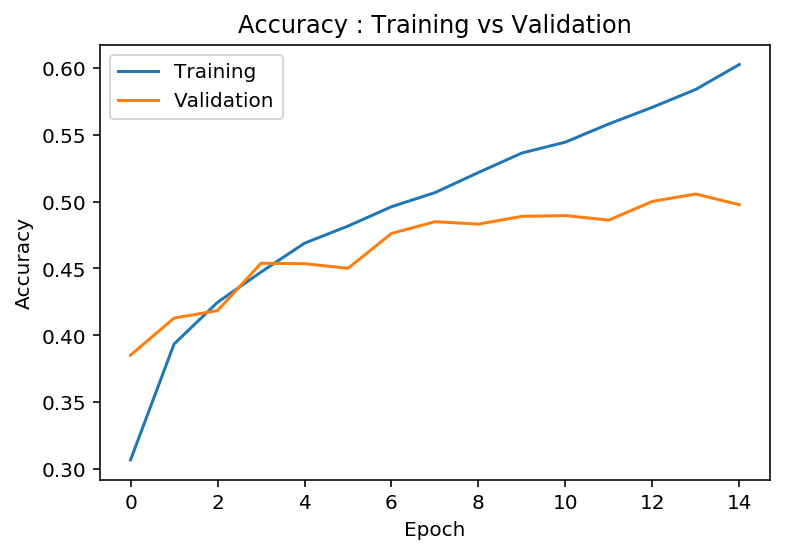

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

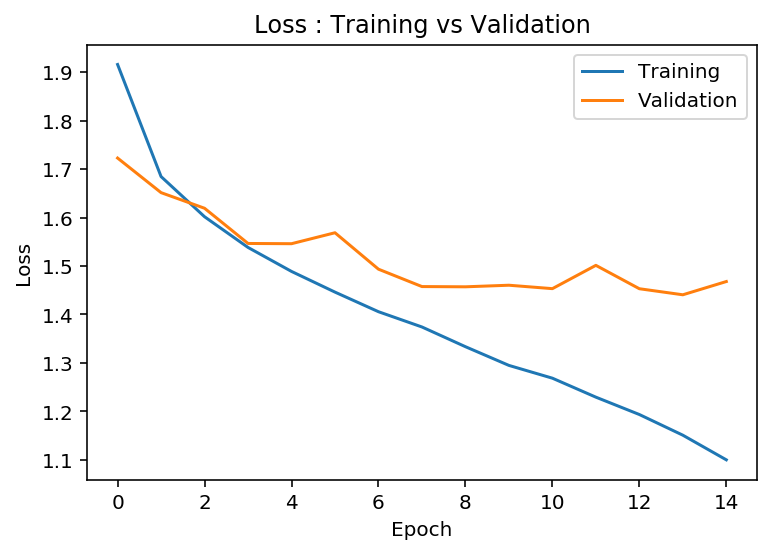

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## One more 1 : Optimizer & Learnig rate

1. optimizer를 상세히 조절할 수 있다. 자세한 내용은 [공식 문서](https://keras.io/optimizers/)를 참고하자!
2. **Learning Rate에 대해선 이해가 필요하다**

다음 그림을 참고하자

![lr](https://cdn-images-1.medium.com/max/1000/1*Q-2Wh0Xcy6fsGkbPFJvMhQ.gif)

![good](https://cdn-images-1.medium.com/max/1200/1*2XgPW7nhBV7ly78at7XqYQ.gif)

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), activation='relu', name = 'Hidden1'))

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, activation = 'relu', name = 'Hidden2') )
model.add( Dense(512, activation = 'relu', name = 'Hidden3') )

# output Layer
model.add( layers.Dense(10, activation = 'softmax')     )

In [0]:
from keras import optimizers

# Optimizer 상세 조절!
# lr : Learning Rate에 대해서 공부하자!
# adam = optimizers.Adam(lr=0.001, decay=0.0)

adam = optimizers.Adam(lr=0.01, decay=0.0001) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 1000,
                    validation_split = 0.2, verbose=1)


Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 2s 60us/step - loss: 14.2202 - acc: 0.0989 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 2/15
40000/40000 [==============================] - 2s 47us/step - loss: 14.5152 - acc: 0.0995 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 3/15
40000/40000 [==============================] - 2s 46us/step - loss: 14.5152 - acc: 0.0995 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 4/15
40000/40000 [==============================] - 2s 46us/step - loss: 14.5152 - acc: 0.0995 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 5/15
40000/40000 [==============================] - 2s 46us/step - loss: 14.5152 - acc: 0.0995 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 6/15
40000/40000 [==============================] - 2s 46us/step - loss: 14.5152 - acc: 0.0995 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 7/15
40000/40000 [==============================] - 2s 45us/step - loss: 14.5152 - acc: 0.0994 - val_loss: 14.

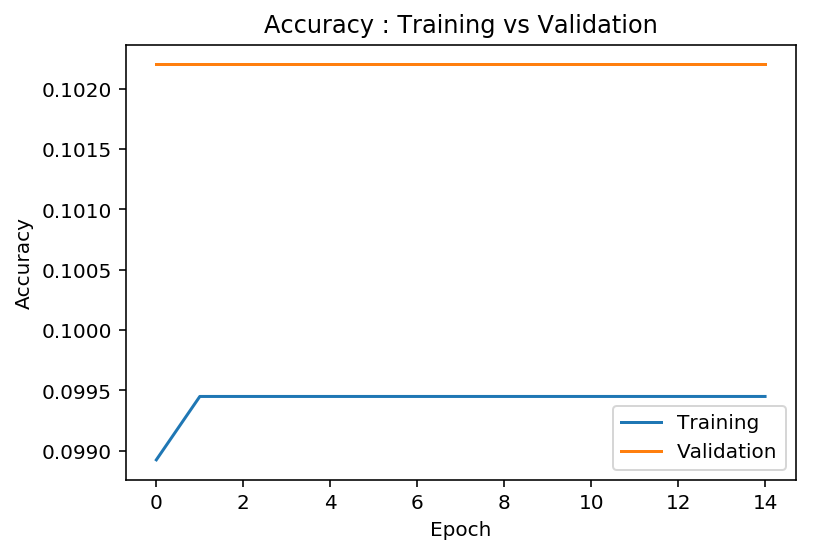

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## One more 2 : Drop out

![일단 보자](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif)

걱정 거리 중 하나.

**만일, 너무 특정노드에만 판단을 의존하면 어쩌지?**

Dropout() 을 이용해서, 랜덤하게 노드들을 inactive하자!

Dropout(0.6) : 학습 단계마다, 랜덤하게 60%의 노드들을 inactive시킨다!

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), activation='relu', name = 'Hidden1'))
model.add( Dropout(0.2) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, activation = 'relu', name = 'Hidden2') )
model.add( Dropout(0.2) )

model.add( Dense(512, activation = 'relu', name = 'Hidden3') )
model.add( Dropout(0.2) )
# output Layer
model.add( layers.Dense(10, activation = 'softmax')     )

W0711 02:38:55.600660 139734213851008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
adam = optimizers.Adam(lr=0.0005) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 100,
                    validation_split = 0.2, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 6s 155us/step - loss: 1.9516 - acc: 0.2878 - val_loss: 1.7936 - val_acc: 0.3589
Epoch 2/15
40000/40000 [==============================] - 6s 142us/step - loss: 1.7907 - acc: 0.3563 - val_loss: 1.7199 - val_acc: 0.3819
Epoch 3/15
40000/40000 [==============================] - 6s 143us/step - loss: 1.7269 - acc: 0.3814 - val_loss: 1.6482 - val_acc: 0.4136
Epoch 4/15
40000/40000 [==============================] - 6s 143us/step - loss: 1.6840 - acc: 0.3923 - val_loss: 1.6404 - val_acc: 0.4194
Epoch 5/15
40000/40000 [==============================] - 6s 144us/step - loss: 1.6458 - acc: 0.4091 - val_loss: 1.6221 - val_acc: 0.4138
Epoch 6/15
40000/40000 [==============================] - 6s 143us/step - loss: 1.6177 - acc: 0.4174 - val_loss: 1.5766 - val_acc: 0.4435
Epoch 7/15
40000/40000 [==============================] - 6s 142us/step - loss: 1.5842 - acc: 0.4276 - val_loss: 1.5452 - 

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## One more 3 : Initialization

Weights, bias들의 '시작점'이 중요하다.
왜 중요한지는 눈으로 보면 안다!

![1](https://www.offconvex.org/assets/optimization-beyond-landscape-trajectories.png)


* kernel_initializer : 가중치에 대한 초기화 방법 결정
* bias_initializer : 편차에 대한 초기화 방법 결정

'glorot_uniform', 'glorot_normal' 을 추천한다

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), activation='relu', name = 'Hidden1',
                kernel_initializer = 'uniform',
                bias_initializer = 'uniform'))
model.add( Dropout(0.1) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, activation = 'relu', name = 'Hidden2',
                kernel_initializer = 'uniform',
                bias_initializer = 'uniform') )
model.add( Dropout(0.1) )

model.add( Dense(512, activation = 'relu', name = 'Hidden3',
                kernel_initializer = 'uniform',
                bias_initializer = 'uniform') )
model.add( Dropout(0.1) )

# output Layer
model.add( layers.Dense(10, activation = 'softmax')   )


# # 혹시 이미 그려둔 그래프가 있다면 날려줘!
# keras.backend.clear_session()

# # model에 순차적으로 레이어를 쌓아가겠다는 의도!
# model = models.Sequential()

# # Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# # 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
# ### 노드 수를 마음 껏 조절해보자!
# model.add( Dense(1024, input_shape=(3072,), activation='relu', name = 'Hidden1',
#                 kernel_initializer = 'glorot_uniform',
#                 bias_initializer = 'glorot_uniform'))
# model.add( Dropout(0.1) )

# ### 노드 수를 마음 껏 조절해보자!
# model.add( Dense(1024, activation = 'relu', name = 'Hidden2',
#                 kernel_initializer = 'glorot_uniform',
#                 bias_initializer = 'glorot_uniform') )
# model.add( Dropout(0.1) )

# model.add( Dense(512, activation = 'relu', name = 'Hidden3',
#                 kernel_initializer = 'glorot_uniform',
#                 bias_initializer = 'glorot_uniform') )
# model.add( Dropout(0.1) )

# # output Layer
# model.add( layers.Dense(10, activation = 'softmax')   )

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), activation='relu', name = 'Hidden1',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform'))
model.add( Dropout(0.1) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, activation = 'relu', name = 'Hidden2',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )
model.add( Dropout(0.1) )

model.add( Dense(512, activation = 'relu', name = 'Hidden3',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )
model.add( Dropout(0.1) )

# output Layer
model.add( layers.Dense(10, activation = 'softmax')   )

In [0]:
adam = optimizers.Adam(lr=0.0005) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 100,
                    validation_split = 0.2, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 6s 152us/step - loss: 1.8941 - acc: 0.3107 - val_loss: 1.7363 - val_acc: 0.3765
Epoch 2/15
40000/40000 [==============================] - 5s 137us/step - loss: 1.7024 - acc: 0.3867 - val_loss: 1.6665 - val_acc: 0.3968
Epoch 3/15
40000/40000 [==============================] - 5s 137us/step - loss: 1.6216 - acc: 0.4190 - val_loss: 1.6554 - val_acc: 0.4058
Epoch 4/15
40000/40000 [==============================] - 6s 138us/step - loss: 1.5685 - acc: 0.4369 - val_loss: 1.5787 - val_acc: 0.4366
Epoch 5/15
40000/40000 [==============================] - 5s 136us/step - loss: 1.5241 - acc: 0.4537 - val_loss: 1.4997 - val_acc: 0.4664
Epoch 6/15
40000/40000 [==============================] - 6s 138us/step - loss: 1.4878 - acc: 0.4653 - val_loss: 1.5023 - val_acc: 0.4686
Epoch 7/15
40000/40000 [==============================] - 5s 136us/step - loss: 1.4658 - acc: 0.4726 - val_loss: 1.4579 - 

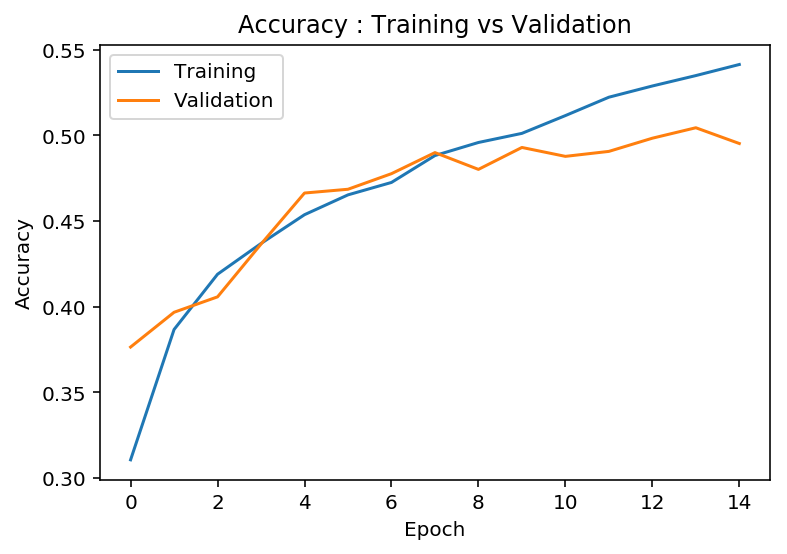

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## One more 4 : Batch normalization

![bn](https://camo.githubusercontent.com/944f05a2565de729ae03d76bb2cb6f9c48e2e552/68747470733a2f2f6d6f7276616e7a686f752e6769746875622e696f2f7374617469632f726573756c74732f746f7263682f352d342d322e676966)

위에서 Scaling을 왜 하는지에 대해서 다뤘다.

Scaling은, Input Layer에 데이터를 넣기 전에 하는 것인데.

1. Hidden Layer를 위한 normalization은 없는가?
2. 그걸 어느정도로 해야 할지 자동화 할 수는 없는가?

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), name = 'Hidden1', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform'))

model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, name = 'Hidden2', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )

model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

model.add( Dense(512, name = 'Hidden3', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

# output Layer
model.add( layers.Dense(10, name = 'OutputLayer', #activation = 'softmax'
                       kernel_initializer = 'glorot_uniform',
                       bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [0]:
adam = optimizers.Adam(lr=0.0005) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 500,
                    validation_split = 0.2, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 4s 110us/step - loss: 1.7291 - acc: 0.3988 - val_loss: 1.8827 - val_acc: 0.3278
Epoch 2/15
 7500/40000 [====>.........................] - ETA: 2s - loss: 1.5714 - acc: 0.4672

KeyboardInterrupt: ignored

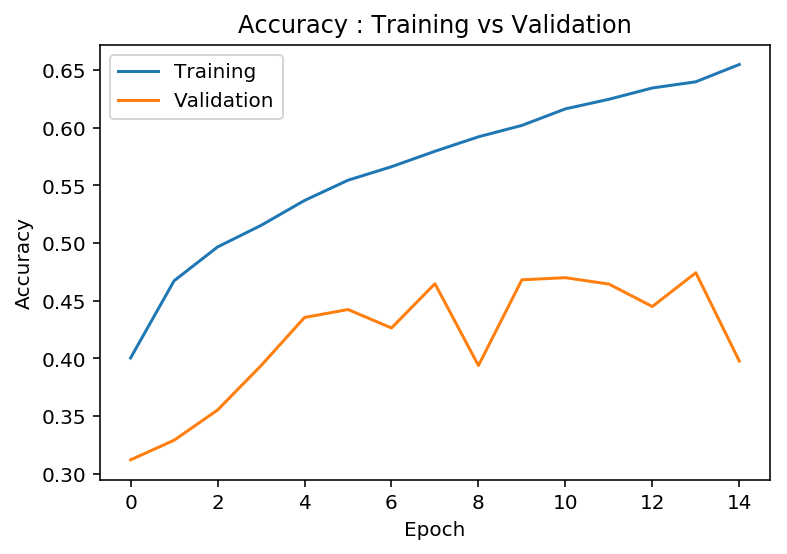

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 1s 53us/step
Test Loss : 1.847301,  Test Accuracy : 39.620%


## One More Last ! : EarlyStopping, and Callbacks

끝까지 가본다!

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, input_shape=(3072,), name = 'Hidden1', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform'))

model.add(BatchNormalization())
model.add(Activation('elu'))

model.add( Dropout(0.1) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(1024, name = 'Hidden2', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )

model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

model.add( Dense(512, name = 'Hidden3', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

# output Layer
model.add( layers.Dense(10, name = 'OutputLayer', #activation = 'softmax'
                       kernel_initializer = 'glorot_uniform',
                       bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [0]:
################################################################################
# 복사해서 수정!!!
################################################################################

# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(2048, input_shape=(3072,), name = 'Hidden1', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform'))

model.add(BatchNormalization())
model.add(Activation('elu'))

model.add( Dropout(0.1) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(2048, name = 'Hidden2', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )

model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

model.add( Dense(512, name = 'Hidden3', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

# output Layer
model.add( layers.Dense(10, name = 'OutputLayer', #activation = 'softmax'
                       kernel_initializer = 'glorot_uniform',
                       bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [0]:
adam = optimizers.Adam(lr=0.0001) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
Hidden2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
__________

* monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
* min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
* patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
* verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
* mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다. 
 *  auto : 관찰하는 이름에 따라 자동으로 지정합니다.
 *  min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
 *  max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.
<br>
<br>
<br>

EarlyStopping 참고자료:<br>
https://tykimos.github.io/2017/07/09/Early_Stopping/

In [0]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                  min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
                  patience = 10, # 개선 없는 epoch 얼마나 기달려 줄거야?
                  verbose = 1
                  )


# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=20000, batch_size = 512,
                    validation_split = 0.2, verbose=1,
                    callbacks = [es])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20000
40000/40000 [==============================] - 3s 71us/step - loss: 1.5365 - acc: 0.4764 - val_loss: 1.7483 - val_acc: 0.3849
Epoch 2/20000
40000/40000 [==============================] - 3s 69us/step - loss: 1.4699 - acc: 0.5008 - val_loss: 1.8102 - val_acc: 0.3555
Epoch 3/20000
40000/40000 [==============================] - 3s 68us/step - loss: 1.4225 - acc: 0.5176 - val_loss: 1.7364 - val_acc: 0.4113
Epoch 4/20000
34304/40000 [========================>.....] - ETA: 0s - loss: 1.3773 - acc: 0.5352

KeyboardInterrupt: ignored

In [0]:
################################################################################
# 복사해서 수정!!!
################################################################################

from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                  min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
                  patience = 10, # 개선 없는 epoch 얼마나 기달려 줄거야?
                  verbose = 1
                  )


# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=20000, batch_size = 2000,
                    validation_split = 0.2, verbose=1,
                   callbacks = [es])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20000
40000/40000 [==============================] - 2s 50us/step - loss: 0.6850 - acc: 0.8613 - val_loss: 1.3920 - val_acc: 0.5436
Epoch 2/20000
40000/40000 [==============================] - 2s 50us/step - loss: 0.6815 - acc: 0.8625 - val_loss: 1.3982 - val_acc: 0.5356
Epoch 3/20000
40000/40000 [==============================] - 2s 49us/step - loss: 0.6810 - acc: 0.8626 - val_loss: 1.3735 - val_acc: 0.5468
Epoch 4/20000
40000/40000 [==============================] - 2s 50us/step - loss: 0.6772 - acc: 0.8641 - val_loss: 1.3771 - val_acc: 0.5441
Epoch 5/20000
40000/40000 [==============================] - 2s 49us/step - loss: 0.6707 - acc: 0.8646 - val_loss: 1.3825 - val_acc: 0.5411
Epoch 6/20000
40000/40000 [==============================] - 2s 49us/step - loss: 0.6672 - acc: 0.8669 - val_loss: 1.3880 - val_acc: 0.5414
Epoch 7/20000
40000/40000 [==============================] - 2s 49us/step - loss: 0.6637 - acc: 0.8684 - val_l

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)


dnn_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
dnn_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('DNN Classifier')
print('트레이닝 정확도 : {:.2f}%'.format(dnn_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(dnn_test_accuracy*100))

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]]))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]]))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]]))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]]))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

## Now your turn!

Fashion MNIST!

배운 지식 총 동원하여 Fashion MNIST 데이터를 분류해보자.

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from keras import layers, models

import random as rd

from sklearn.metrics import accuracy_score

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

In [0]:
labels = { 0 : 'T-shirt/top',
          1 : 'Trouser',
          2 : 'Pullover',
          3 : 'Dress',
          4 : 'Coat',
          5 : 'Sandal',
          6 : 'Shirt',
          7 : 'Sneaker',
          8 : 'Bag',
          9 : 'Ankle boot' }

print(labels)

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id]] ))
plt.imshow(test_x[id])
plt.show()

In [0]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

print(train_x.shape, test_x.shape)

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# 첫번째 Hidden 레이어를 add할 때는 input의 shape를 항상 정해줘야 한다!
### 노드 수를 마음 껏 조절해보자!
model.add( Dense(2048, input_shape=(3072,), name = 'Hidden1', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform'))

model.add(BatchNormalization())
model.add(Activation('elu'))

model.add( Dropout(0.1) )

### 노드 수를 마음 껏 조절해보자!
model.add( Dense(2048, name = 'Hidden2', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )

model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

model.add( Dense(512, name = 'Hidden3', # activation = 'relu',
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add( Dropout(0.1) )

# output Layer
model.add( layers.Dense(10, name = 'OutputLayer', #activation = 'softmax'
                       kernel_initializer = 'glorot_uniform',
                       bias_initializer = 'glorot_uniform') )
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [0]:
from keras import optimizers

adam = optimizers.Adam(lr=0.0001) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
Hidden2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
__________

In [0]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                  min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
                  patience = 10, # 개선 없는 epoch 얼마나 기달려 줄거야?
                  verbose = 1
                  )


# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=20000, batch_size = 512,
                    validation_split = 0.2, verbose=1,
                    callbacks = [es])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20000
40000/40000 [==============================] - 4s 101us/step - loss: 1.6485 - acc: 0.4354 - val_loss: 1.6866 - val_acc: 0.4232
Epoch 2/20000
40000/40000 [==============================] - 4s 95us/step - loss: 1.5334 - acc: 0.4849 - val_loss: 1.6719 - val_acc: 0.4193
Epoch 3/20000
40000/40000 [==============================] - 4s 96us/step - loss: 1.4705 - acc: 0.5150 - val_loss: 1.7364 - val_acc: 0.3895
Epoch 4/20000
40000/40000 [==============================] - 4s 96us/step - loss: 1.4168 - acc: 0.5398 - val_loss: 1.6534 - val_acc: 0.4373
Epoch 5/20000
40000/40000 [==============================] - 4s 93us/step - loss: 1.3780 - acc: 0.5593 - val_loss: 1.6529 - val_acc: 0.4482
Epoch 6/20000
40000/40000 [==============================] - 4s 95us/step - loss: 1.3451 - acc: 0.5729 - val_loss: 1.6621 - val_acc: 0.4157
Epoch 7/20000
40000/40000 [==============================] - 4s 94us/step - loss: 1.3020 - acc: 0.5908 - val_